<a href="https://colab.research.google.com/github/heisenberg0123/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics

Importing Datasets

In [ ]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_price_dataframe['Price']=house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.shape

(20640, 9)

In [ ]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
coorelation=house_price_dataframe.corr()

<Axes: >

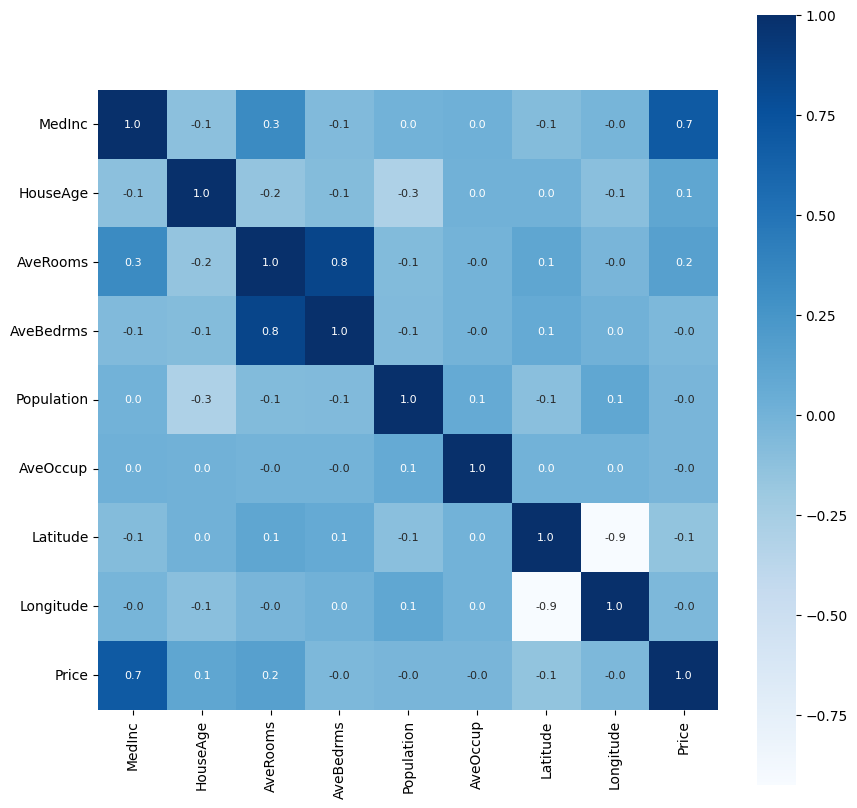

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(coorelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [ ]:
house_price_dataframe.groupby(['Price']).mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
Price,,,,,,,,
0.14999,2.122475,30.750000,6.575951,2.016259,305.25000,2.566440,37.665000,-120.197500
0.17500,2.366700,39.000000,3.572464,1.217391,259.00000,1.876812,34.150000,-118.330000
0.22500,1.818075,36.250000,3.975628,1.265805,2112.00000,3.652335,36.005000,-119.335000
0.25000,0.857100,21.000000,1.629630,1.222222,64.00000,2.370370,32.790000,-114.650000
0.26600,2.301300,34.000000,4.897959,1.051020,808.00000,2.748299,35.130000,-119.450000
...,...,...,...,...,...,...,...,...
4.98800,8.248000,29.000000,7.072727,0.978182,826.00000,3.003636,37.330000,-122.060000
4.99000,8.148900,18.000000,6.600817,1.001362,1634.00000,2.226158,37.890000,-122.180000
4.99100,6.786100,28.000000,7.386861,1.083942,617.00000,2.251825,33.550000,-117.770000


In [ ]:
X=house_price_dataframe.drop(['Price'],axis=1)
Y=house_price_dataframe['Price']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction=model.predict(X_train)

In [ ]:
score_1=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ',score_1)
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute Error : ',score_2)

R squared error :  0.9419821992061036
Mean Absolute Error :  0.19650452621494796


In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
score_1=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',score_1)
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('Mean Absolute Error : ',score_2)

R squared error :  0.8287584094447401
Mean Absolute Error :  0.3132492524404488


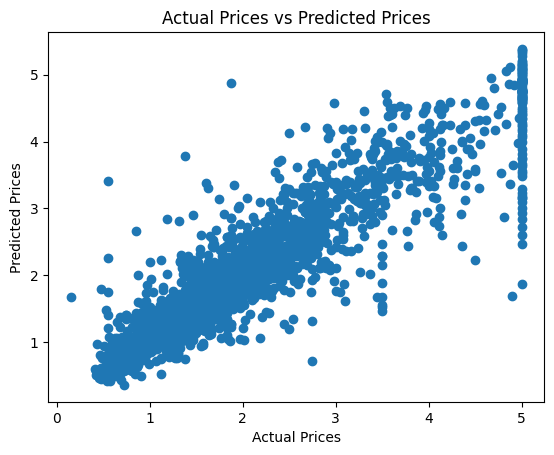

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show( )